In [17]:
%matplotlib inline

In [18]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

In [19]:
movies_df = pd.read_csv('./MoviesOnStreamingPlatforms.csv')
movies_df=movies_df.iloc[:, 1:].set_index('ID')
movies_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0
2,Dangal,2016,7+,97/100,1,0,0,0,0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
5,Roma,2018,18+,94/100,1,0,0,0,0


In [20]:
movies_df['Streaming platform']=''
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']: 
    movies_df.loc[movies_df[each_platform]==1, 'Streaming platform']=each_platform

# Which streaming platform offers recent movies?


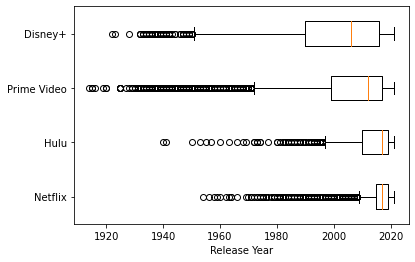

In [35]:
grouped_df = movies_df.groupby('Streaming platform')
year_data = {
    "Netflix": [],
    "Hulu": [],
    "Prime Video": [],
    "Disney+": []
}

for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
    new_data = []
    for index, row in grouped_df.get_group(each_platform).iterrows():    
        new_data.append(row['Year'])
    year_data[f'{each_platform}'] = new_data
    
plot_data = []
plot_labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
for attr, value in year_data.items():
    plot_data.append(value)
    
fig = plt.figure()
ax = fig.add_subplot()
ax.boxplot(plot_data, vert=False, labels=plot_labels)
ax.set_xlabel('Release Year')
        
plt.show()


# Which streaming platform provides movies with better score?

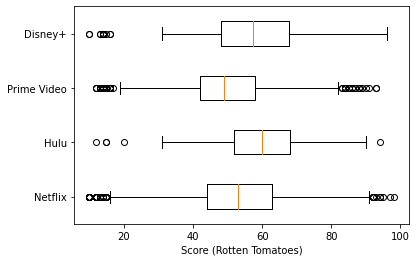

In [57]:
score_data = {
    "Netflix": [],
    "Hulu": [],
    "Prime Video": [],
    "Disney+": []
}

for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
    new_data = []
    for index, row in grouped_df.get_group(each_platform).iterrows():
        if (len(str(row['Rotten Tomatoes']).split('/'))==2):
            score = float(row['Rotten Tomatoes'].split('/')[0])
            new_data.append(score)
    score_data[f'{each_platform}'] = new_data
                        
score_plot_data = []
for attr, value in score_data.items():
    score_plot_data.append(value)
    
score_fig = plt.figure()
score_ax = score_fig.add_subplot()
score_ax.boxplot(score_plot_data, vert=False, labels=plot_labels)
score_ax.set_xlabel('Score (Rotten Tomatoes)')
        
plt.show()

# Which streaming platform offers the highest number of movies?

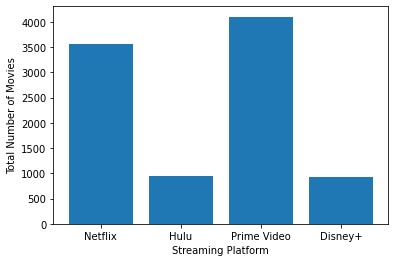

In [64]:
sum_plot_data = []
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
    sum_plot_data.append(movies_df['Streaming platform'].value_counts()[each_platform])
    
    
plt.bar(plot_labels, sum_plot_data)
plt.xlabel("Streaming Platform")
plt.ylabel("Total Number of Movies")
        
plt.show()